In [1]:
import tensorflow as tf
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

from IPython.display import clear_output
import matplotlib.pyplot as plt


import tensorflow as tf
tf.config.experimental.set_visible_devices([], 'GPU')

In [8]:
dataset, info = tfds.load('oxford_flowers102',split = ['train[:100%]','test[:100%]'], with_info=True)

In [9]:
info

tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly occurring
    in the United Kingdom. Each class consists of between 40 and 258 images. The images have
    large scale, pose and light variations. In addition, there are categories that have large
    variations within the category and several very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set.
    The training set and validation set each consist of 10 images per class (totalling 1020 images each).
    The test set consists of the remaining 6149 images (minimum 20 per class).
    """,
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102/',
    data_path='/home/tefi/tensorflow_datasets/oxford_flowers102/2.1.1',
    download_size=328.90 MiB,
    dataset_size=331.34 MiB,
    features=FeaturesDict({
        'file_name': Text(

In [10]:
dataset

[<PrefetchDataset shapes: {file_name: (), image: (None, None, 3), label: ()}, types: {file_name: tf.string, image: tf.uint8, label: tf.int64}>,
 <PrefetchDataset shapes: {file_name: (), image: (None, None, 3), label: ()}, types: {file_name: tf.string, image: tf.uint8, label: tf.int64}>]

In [11]:
def normalize_c(input_image, label):
  input_image = tf.cast(input_image, tf.float32) / 255.0
  #label -= 1
  return input_image, label

def load_image_train_c(datapoint):
  input_image = tf.image.resize(datapoint['image'],(128,128))
  label = datapoint['label']

  if tf.random.uniform(()) > 0.5:
    input_image = tf.image.flip_left_right(input_image)


  input_image, label = normalize_c(input_image, label)

  return input_image, label

def load_image_test_c(datapoint):
  input_image = tf.image.resize(datapoint['image'], (128, 128))
  input_mask = label = datapoint['label']

  input_image, label = normalize_c(input_image, label)

  return input_image, label 

In [12]:
dataset[0]

<PrefetchDataset shapes: {file_name: (), image: (None, None, 3), label: ()}, types: {file_name: tf.string, image: tf.uint8, label: tf.int64}>

In [19]:
train = dataset[0].map(load_image_train_c)
train

<MapDataset shapes: ((128, 128, 3), ()), types: (tf.float32, tf.int64)>

In [27]:
len(train)

1020

In [25]:
test = dataset[1].map(load_image_test_c)
test

<MapDataset shapes: ((128, 128, 3), ()), types: (tf.float32, tf.int64)>

In [26]:
len(test)

6149

In [55]:
train_image = 
train_label = 
test_image = 
test_label = 


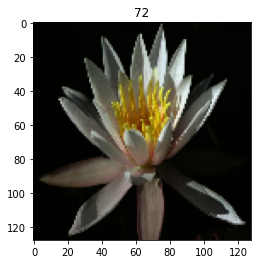

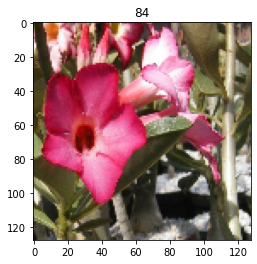

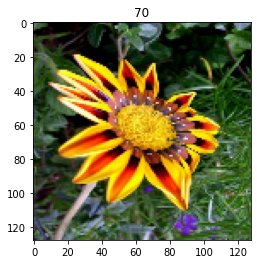

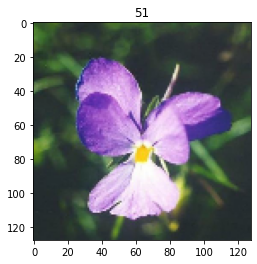

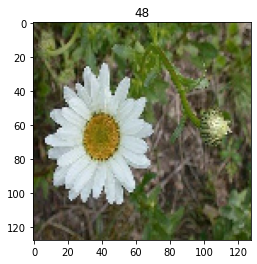

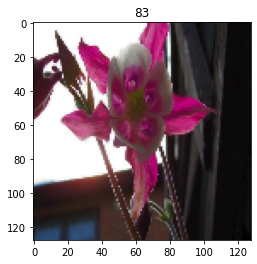

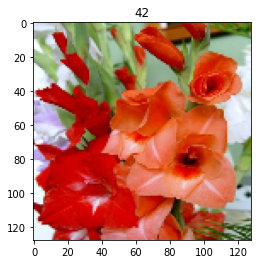

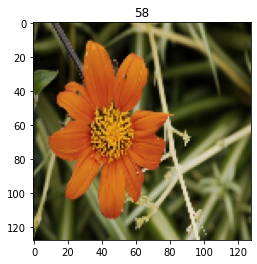

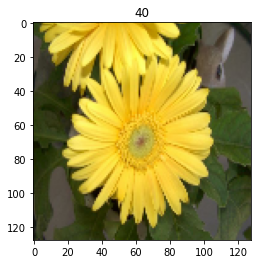

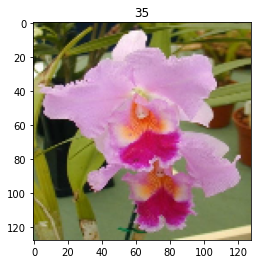

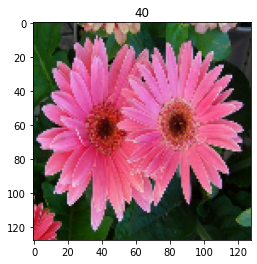

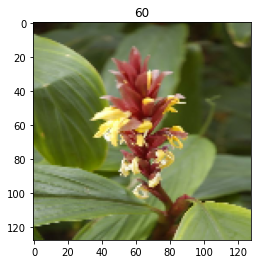

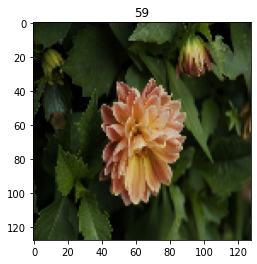

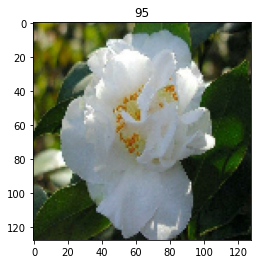

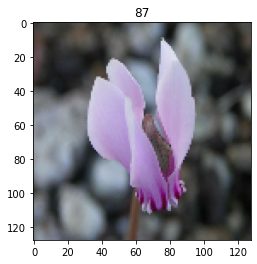

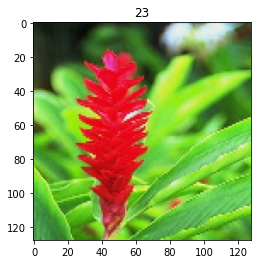

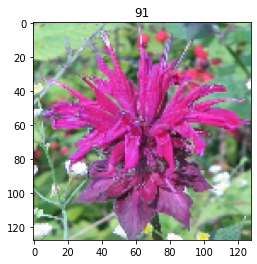

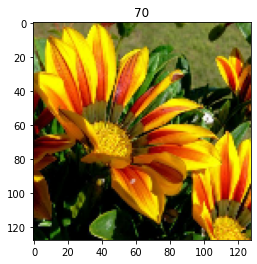

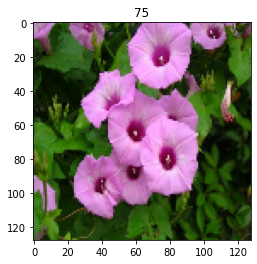

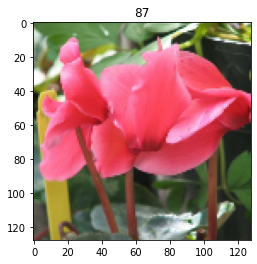

In [20]:
for image, label in train.take(20):
  sample_image, sample_label = image, label
  plt.imshow(sample_image.numpy()[:,:,:])
  plt.title(sample_label.numpy())
  plt.show()